In [5]:
import json
import numpy as np
import statistics
import os
import csv
import pandas as pd

In [6]:
def most_frequent(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency > counter):
            counter = curr_frequency
            num = i
 
    return counter

In [7]:
def data_preparation(data):
    massList = []
    widthList = []
    heightList = []
    lengthList = []
    volumeList = []
    rotationNotZeroCount=0
    countStacking = 0
    countTurnover = 0
    boxesCount = 0
    for x in data['data_result']['boxes']:
        massList.append(x['mass'])
        widthList.append(x['size']['width'])
        heightList.append(x['size']['height'])
        lengthList.append(x['size']['length'])
        volumeList.append(x['size']['width']*x['size']['height']*x['size']['length'])
        if x['stacking'] == True:
            countStacking += 1
        if x['turnover'] == True:
            countTurnover += 1
        if x['rotation_state'] != 0:
            rotationNotZeroCount += 1
        boxesCount += 1
    width_statistics = np.quantile(widthList, [0, 0.25, 0.5, 0.75, 1])
    height_statistics = np.quantile(heightList, [0, 0.25, 0.5, 0.75, 1])
    length_statistics = np.quantile(lengthList, [0, 0.25, 0.5, 0.75, 1])
    width_statistics_1 = width_statistics[0]
    width_statistics_2 = width_statistics[1]
    width_statistics_3 = width_statistics[2]
    width_statistics_4 = width_statistics[3]
    width_statistics_5 = width_statistics[4]
    height_statistics_1 = height_statistics[0]
    height_statistics_2 = height_statistics[1]
    height_statistics_3 = height_statistics[2]
    height_statistics_4 = height_statistics[3]
    height_statistics_5 = height_statistics[4]
    length_statistics_1 = length_statistics[0]
    length_statistics_2 = length_statistics[1]
    length_statistics_3 = length_statistics[2]
    length_statistics_4 = length_statistics[3]
    length_statistics_5 = length_statistics[4]
    mostWithSameWidthPercent = most_frequent(widthList) / boxesCount
    mostWithSameheightPercent = most_frequent(heightList) / boxesCount
    mostWithSameLengthPercent = most_frequent(lengthList) / boxesCount
    meanWidth = statistics.mean(widthList)
    meanHeight = statistics.mean(heightList)
    meanLength = statistics.mean(lengthList)
    meanVolume = statistics.mean(volumeList)
    meanMass = statistics.mean(massList)

    loadingWidth = data['data_result']['cargo_space']['loading_size']['width']
    loadingHeight = data['data_result']['cargo_space']['loading_size']['height']
    loadingLength = data['data_result']['cargo_space']['loading_size']['length']

    density_percent = data['data_result']['cargo_space']['calculation_info']['density_percent']

    values = [width_statistics_1, width_statistics_2, width_statistics_3, width_statistics_4, width_statistics_5,
              height_statistics_1, height_statistics_2, height_statistics_3, height_statistics_4, height_statistics_5,
              length_statistics_1, length_statistics_2, length_statistics_3, length_statistics_4, length_statistics_5,
              mostWithSameWidthPercent, mostWithSameheightPercent, mostWithSameLengthPercent, 
              meanWidth, meanHeight, meanLength, meanVolume, 
              rotationNotZeroCount, countStacking, countTurnover, boxesCount, 
              loadingWidth, loadingHeight, loadingLength, meanMass, density_percent]
    
    return values

In [8]:
def write_to_csv(param):
  field = ['width_statistics_1', 'width_statistics_2', 'width_statistics_3', 'width_statistics_4', 'width_statistics_5',
           'height_statistics_1', 'height_statistics_2', 'height_statistics_3', 'height_statistics_4', 'height_statistics_5',
           'length_statistics_1', 'length_statistics_2', 'length_statistics_3','length_statistics_4','length_statistics_5',
           'mostWithSameWidthPercent', 'mostWithSameheightPercent', 'mostWithSameLengthPercent',
           'meanWidth','meanHeight','meanLength','meanVolume',
           'rotationNotZeroCount', 'countStacking', 'countTurnover', 'boxesCount', 
           'loadingWidth', 'loadingHeight', 'loadingLength','meanMass', 'density_percent']
  filename = 'data.csv'
  with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(field)
    writer.writerows(param)

In [9]:
folder_path = r"C:\Users\sinaa\Downloads\ALGORITM\ALGORITM"

file_list = os.listdir(folder_path)

param = []

for file_name in file_list:
    # Проверяем, что файл имеет расширение .json
    if file_name.endswith('.json'):
        # Формируем полный путь к файлу
        file_path = os.path.join(folder_path, file_name)
        
        # Открываем файл и читаем его содержимое
        jsonFile = open(file_path, 'r', encoding='utf-8')
        # Загружаем JSON-данные
        data = json.load(jsonFile)
        new_row = data_preparation(data)
        param.append(new_row)
        jsonFile.close()


In [10]:
#запись в файл csv
write_to_csv(param)

In [11]:
df = pd.read_csv('data.csv')
df

,width_statistics_1,width_statistics_2,width_statistics_3,width_statistics_4,width_statistics_5,height_statistics_1,height_statistics_2,height_statistics_3,height_statistics_4,height_statistics_5,...,meanVolume,rotationNotZeroCount,countStacking,countTurnover,boxesCount,loadingWidth,loadingHeight,loadingLength,meanMass,density_percent
0,57.0,97.0,150.0,166.0,297.0,115.0,133.5,180.0,213.0,311.0,...,5.811433e+06,212,270,270,270,800.0,2000.0,1200.0,2.3943,81.76416
1,300.0,300.0,300.0,300.0,300.0,250.0,250.0,250.0,250.0,250.0,...,3.000000e+07,32,33,0,33,800.0,2000.0,1200.0,6.0000,82.50000
2,800.0,800.0,800.0,800.0,800.0,1550.0,1550.0,1550.0,1550.0,1550.0,...,1.488000e+09,0,0,0,17,2500.0,2100.0,7500.0,400.0000,94.44444
3,200.0,300.0,300.0,300.0,300.0,200.0,200.0,300.0,300.0,300.0,...,3.230303e+07,17,33,33,33,800.0,1650.0,1200.0,15.0000,74.02778
4,800.0,800.0,800.0,800.0,800.0,1600.0,1600.0,1600.0,1600.0,1600.0,...,1.536000e+09,30,0,0,33,2490.0,2590.0,13490.0,720.0000,100.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,800.0,800.0,800.0,823.0,986.0,2095.0,2095.0,2095.0,2095.0,2095.0,...,2.099682e+09,28,0,0,28,2400.0,2400.0,13300.0,250.0000,91.90237
624,800.0,800.0,800.0,823.0,908.0,2095.0,2095.0,2095.0,2095.0,2095.0,...,2.055641e+09,31,0,0,31,2400.0,2400.0,13300.0,250.0000,97.00727
625,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,1.000000e+06,0,1,1,1,2450.0,2350.0,7000.0,10.0000,100.00000
626,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,1.000000e+06,0,2,2,2,2450.0,2350.0,7000.0,10.0000,100.00000


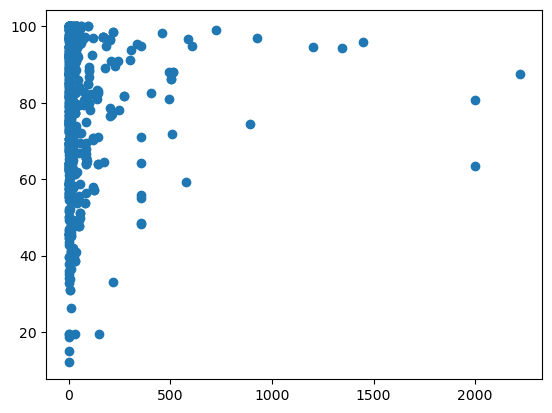

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(df.countTurnover,df.density_percent)